# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

Creado en [escueladedatosvivos.ai](https://escueladedatosvivos.ai) 🚀.

¿Consultas? En la página tenés soporte por IA guiada, comunidad y el acceso a certificación.

<br>

---  

# Dataset 🧠

El dataset proviene de Kaggle: [Stroke prediction dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

# AED 1 🤓

## 1) Cargamos los datos 📕

In [106]:
import pandas as pd

data=pd.read_csv("data/healthcare-dataset-stroke-data.csv", sep = ",")

## 2) Estado de salud de un dataframe 👀

In [107]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [108]:
from funpymodeling.exploratory import status 
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.0,0,0.000000,5110,int64
1,gender,0,0.0,0,0.000000,3,object
...,...,...,...,...,...,...,...
10,smoking_status,0,0.0,0,0.000000,4,object
11,stroke,0,0.0,4861,0.951272,2,int64


Eliminar columnas no relevantes para el análisis

In [109]:
data = data.drop(['id'], axis=1)

## 3) Variables numéricas

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

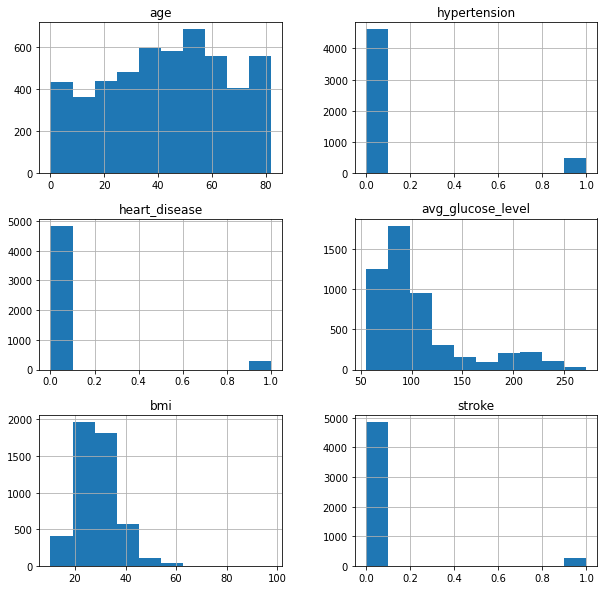

In [110]:
data.hist(figsize = (10,10))

In [111]:
from funpymodeling.exploratory import profiling_num

profiling_num(data)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,age,43.226614,22.612647,0.523119,1.08,5.00,25.0,45.0,61.0,79.00,82.0
1,hypertension,0.097456,0.296607,3.043494,0.00,0.00,0.0,0.0,0.0,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4,bmi,28.893237,7.854067,0.271831,15.10,17.64,23.5,28.1,33.1,42.96,53.4
5,stroke,0.048728,0.215320,4.418813,0.00,0.00,0.0,0.0,0.0,0.00,1.0


Describe de Pandas

In [112]:
# La .T es de Transpuesta
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,0.097456,0.296607,0.00,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
bmi,4909.0,28.893237,7.854067,10.30,23.5,28.1,33.1,97.6
stroke,5110.0,0.048728,0.215320,0.00,0.0,0.0,0.0,1.0


## 4) Variables categóricas

In [113]:
import seaborn as sns 

Vamos a ver 2 formas de expresar lo mismo.

<AxesSubplot:xlabel='count', ylabel='work_type'>

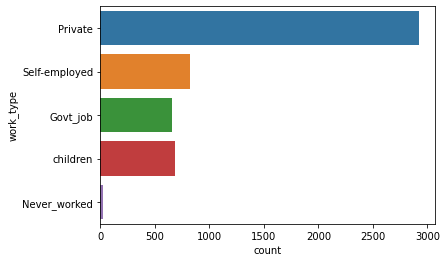

In [114]:
sns.countplot(y='work_type', data=data)    

<AxesSubplot:xlabel='count', ylabel='work_type'>

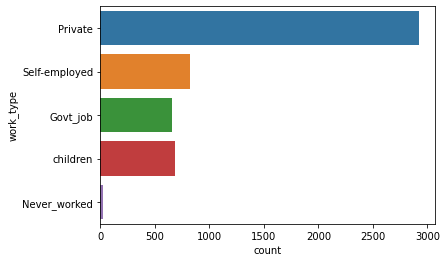

In [115]:
sns.countplot(y=data['work_type'])    

Ordenando por count

<AxesSubplot:xlabel='count', ylabel='work_type'>

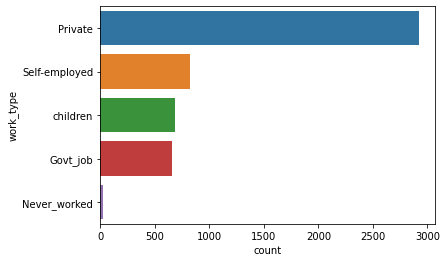

In [116]:
sns.countplot(y=data['work_type'], order = data['work_type'].value_counts().index)

In [117]:
import matplotlib.pyplot as plt

Modificando el tamaño

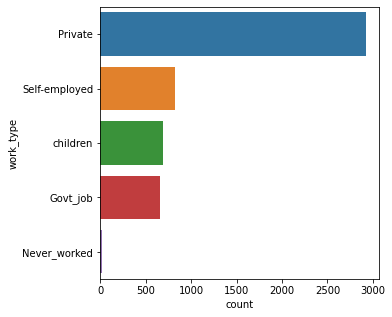

In [118]:
plt.figure(figsize=(5,5))
sns.countplot(y=data['work_type'], order = data['work_type'].value_counts().index)
plt.show()

### Análisis cuantitativo de variables categóricas

In [119]:
from funpymodeling.exploratory import freq_tbl

In [120]:
freq_tbl(data['work_type'])

,work_type,frequency,percentage,cumulative_perc
0,Private,2925,0.572407,0.572407
1,Self-employed,819,0.160274,0.732681
2,children,687,0.134442,0.867123
3,Govt_job,657,0.128571,0.995695
4,Never_worked,22,0.004305,1.000000


_Nota:_ Acá usamos `query`, no se aconseja por quedar la query en un string.

In [121]:
t_country=freq_tbl(data.smoking_status)

t_country.query("frequency<=1000")['smoking_status']

2    formerly smoked
3             smokes
Name: smoking_status, dtype: object

### Resumen (hasta ahora)

- status (funpymodeling)
- profiling_num (funpyodeling)
- describe (pandas)
- hist (pandas)
- countplot (seaborn)
- freq_tbl

## 5) Pandas profiling

In [122]:
from ydata_profiling import ProfileReport

ProfileReport(data, minimal=True)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]


Pero no vemos los NaN...

In [123]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,gender,0,0.0,0,0.000000,3,object
1,age,0,0.0,0,0.000000,104,float64
...,...,...,...,...,...,...,...
9,smoking_status,0,0.0,0,0.000000,4,object
10,stroke,0,0.0,4861,0.951272,2,int64


## Resumen 📌

#### Conceptos de:

- Análisis univariado
- Alta cardinalidad, tipos de datos, nulos, ceros
- Métricas de dispersión
- Var num y cat (gráficos y valores)

#### Funciones

- status (funpymodeling)
- profiling_num (funpymodeling)
- describe (pandas)
- hist (pandas)
- countplot (seaborn)
- freq_tbl

# AED 2 😧

## 1) Análisis de variables categóricas

Función freq_tbl de funpymodeling

In [124]:
freq_tbl(data['gender'])

,gender,frequency,percentage,cumulative_perc
0,Female,2994,0.585910,0.585910
1,Male,2115,0.413894,0.999804
2,Other,1,0.000196,1.000000


In [125]:
freq_tbl(data)

   gender  frequency  percentage  cumulative_perc
0  Female       2994    0.585910         0.585910
1    Male       2115    0.413894         0.999804
2   Other          1    0.000196         1.000000

----------------------------------------------------------------

  ever_married  frequency  percentage  cumulative_perc
0          Yes       3353    0.656164         0.656164
1           No       1757    0.343836         1.000000

----------------------------------------------------------------

       work_type  frequency  percentage  cumulative_perc
0        Private       2925    0.572407         0.572407
1  Self-employed        819    0.160274         0.732681
2       children        687    0.134442         0.867123
3       Govt_job        657    0.128571         0.995695
4   Never_worked         22    0.004305         1.000000

----------------------------------------------------------------

  Residence_type  frequency  percentage  cumulative_perc
0          Urban       2596    0.50

## 2) Análisis bivariado

### 2.A) Análisis de categórica vs. categórica

In [126]:
pd.crosstab(data.gender, data.smoking_status)

smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
Female,836,477,1229,452
Male,708,407,663,337
Other,0,1,0,0


In [127]:
pd.crosstab(data.gender, data.smoking_status, margins=True)

smoking_status,Unknown,formerly smoked,never smoked,smokes,All
gender,,,,,
Female,836,477,1229,452,2994
Male,708,407,663,337,2115
Other,0,1,0,0,1
All,1544,885,1892,789,5110


Porcentages totales (suma de celdas 100%)

In [128]:
pd.crosstab(data.gender, data.smoking_status, normalize=True)

smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
Female,0.163601,0.093346,0.240509,0.088454
Male,0.138552,0.079648,0.129746,0.065949
Other,0.000000,0.000196,0.000000,0.000000


Porcentages por registro (útil para selección de variables)

In [129]:
pd.crosstab(data.gender, data.smoking_status, normalize='index', margins=True)

smoking_status,Unknown,formerly smoked,never smoked,smokes
gender,,,,
Female,0.279225,0.159319,0.410488,0.150969
Male,0.334752,0.192435,0.313475,0.159338
Other,0.000000,1.000000,0.000000,0.000000
All,0.302153,0.173190,0.370254,0.154403


Nota: Se usó la notación de punto como simple demostración, de ahora en más se usará la notación de corchetes por dos motivos:

En vez de `data.gender`, usar `data['gender']`. 
<br>Son más caracteres de tipeo, pero se estandariza el código.

- No se puede usar para crear columnas nuevas
- No funciona si las variables tienen espacios

In [130]:
pd.crosstab(data['gender'], data['work_type'], margins=True, normalize=True)

work_type,Govt_job,Never_worked,Private,Self-employed,children,All
gender,,,,,,
Female,0.078082,0.002153,0.343249,0.098630,0.063796,0.585910
Male,0.050489,0.002153,0.228963,0.061644,0.070646,0.413894
Other,0.000000,0.000000,0.000196,0.000000,0.000000,0.000196
All,0.128571,0.004305,0.572407,0.160274,0.134442,1.000000


### 2.B) Análisis de numérica vs. categórica

¿Cambia el valor de hipertensión en función del género?

In [131]:
data.groupby('gender')['hypertension'].mean()

gender
Female    0.092184
Male      0.104965
Other     0.000000
Name: hypertension, dtype: float64

In [132]:
data.groupby('gender')['hypertension'].mean().sort_values(ascending=False)

gender
Male      0.104965
Female    0.092184
Other     0.000000
Name: hypertension, dtype: float64

Un análisis más detallado

In [133]:
data.groupby('gender')['hypertension'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,2994.0,0.092184,0.289334,0.0,0.0,0.0,0.0,1.0
Male,2115.0,0.104965,0.306580,0.0,0.0,0.0,0.0,1.0
Other,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


Promedio de todas las variables, por nuestra variable a predecir

In [134]:
data.groupby('gender').mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,
Female,43.757395,0.092184,0.037742,104.057809,29.065758,0.047094
Male,42.483385,0.104965,0.077069,109.088520,28.647936,0.051064
Other,26.000000,0.000000,0.000000,143.330000,22.400000,0.000000


### 2.C) Análisis de numérica vs. numérica

¿Cambia el valor de hipertensión en función de su edad?

In [135]:
data.groupby('age')['hypertension'].mean()

age
0.08     0.000000
0.16     0.000000
           ...   
81.00    0.266667
82.00    0.232143
Name: hypertension, Length: 104, dtype: float64

In [136]:
data.groupby('age')['hypertension'].mean().sort_values(ascending=False)

age
71.00    0.311475
70.00    0.311111
           ...   
4.00     0.000000
0.08     0.000000
Name: hypertension, Length: 104, dtype: float64

Un análisis más detallado

In [137]:
data.groupby('age')['hypertension'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0.08,2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
0.16,3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
81.00,60.0,0.266667,0.445948,0.0,0.0,0.0,1.0,1.0
82.00,56.0,0.232143,0.426021,0.0,0.0,0.0,0.0,1.0


Promedio de todas las variables, por nuestra variable a predecir

In [138]:
data.groupby('age').mean()

,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,,,,,
0.08,0.000000,0.000000,105.000000,15.500000,0.000000
0.16,0.000000,0.000000,98.006667,14.766667,0.000000
...,...,...,...,...,...
81.00,0.266667,0.216667,117.180167,27.951667,0.233333
82.00,0.232143,0.250000,130.483571,28.029091,0.160714


## 3) Gráficos en AED

### 3.A) Análisis de numérica vs. categórica

<AxesSubplot:xlabel='smoking_status', ylabel='age'>

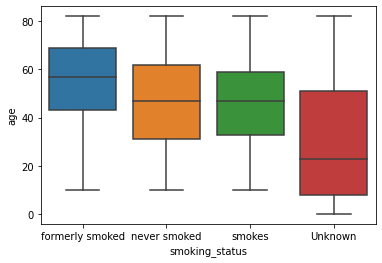

In [139]:
import seaborn as sns

sns.boxplot(y = 'age', x = 'smoking_status', data = data)

Si queremos ver mejor las distribuciones: Gráfico de violín.

<AxesSubplot:xlabel='smoking_status', ylabel='age'>

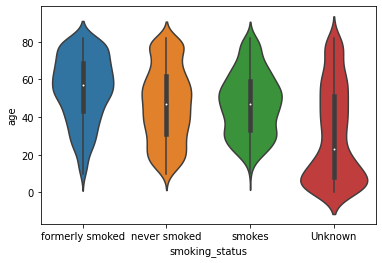

In [140]:
sns.violinplot(y='age', x = 'smoking_status', data = data)

### 3.B) Análisis de categórica vs. categórica

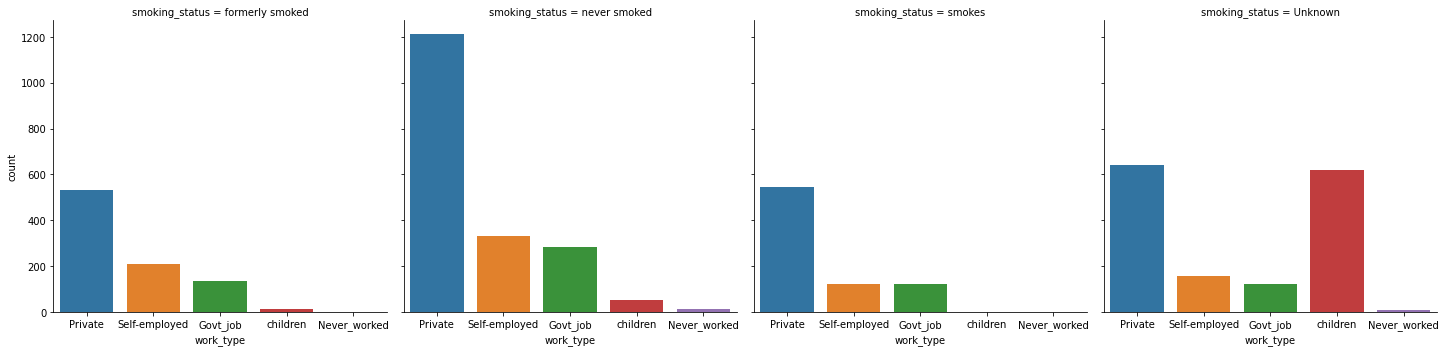

In [141]:
g = sns.catplot(x="work_type",
                col="smoking_status",
                data= data,
                kind="count")

### 3.C) Análisis de numérica vs. numérica

Para todo el dataset, ¡pero con cuidado!

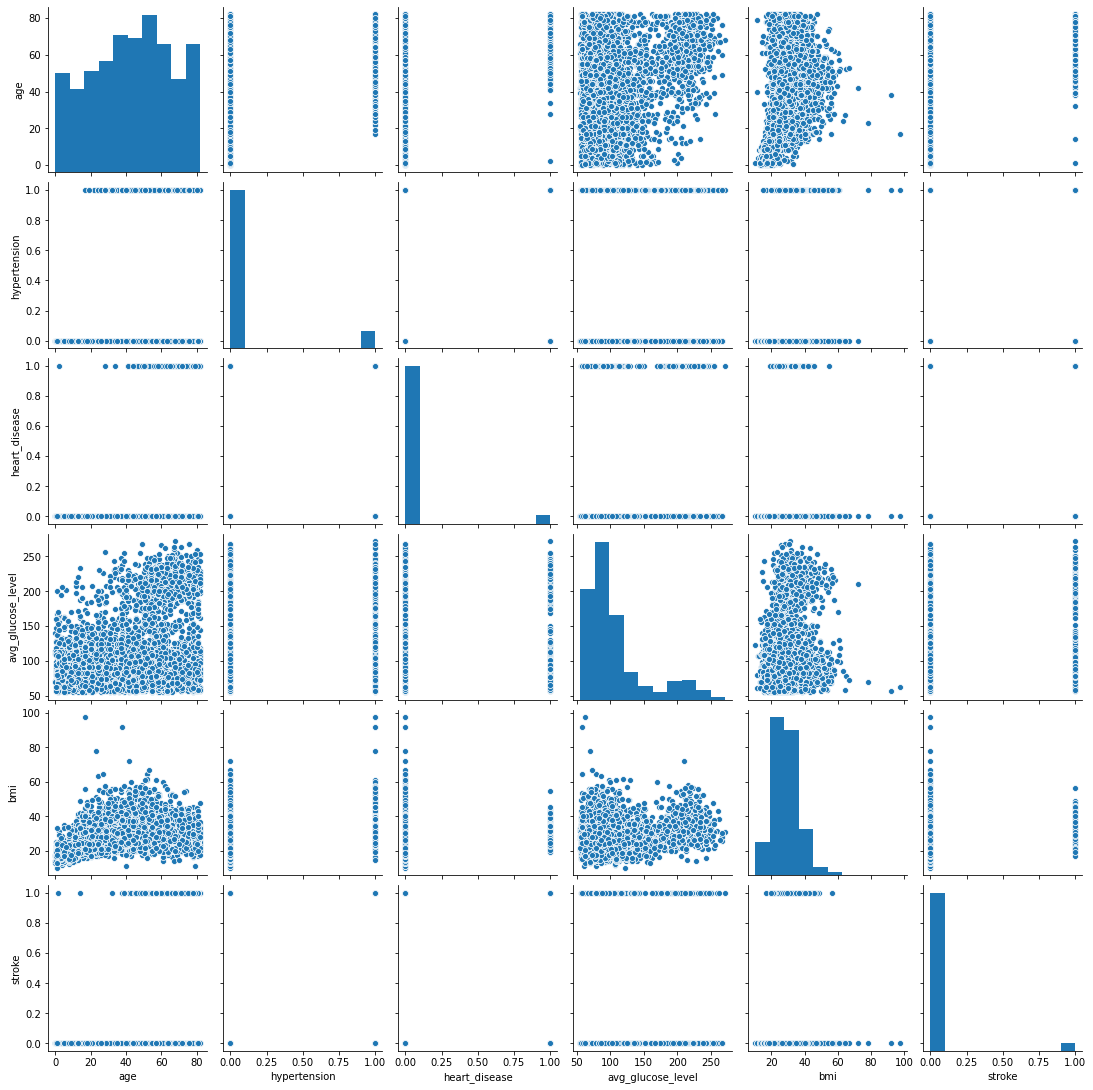

In [142]:
sns.pairplot(data)

## Resumen 📌

- Análisis bivariado (num vs num, cat vs cat, cat vs num)
- Gráficos y analítica (ojo con la combinatoria)
- Precaución con las proporciones.
- Tipos de gráficos: Boxplot, scatter, barras y violín.

# CORRELACIÓN 🤯

#### Resumen estadísticos:

- Pearson (el más conocido y usado), y es parecido a Spearman.
- Phik: sirve para numéricas y categóricas
- Cramer: sirve para categóricas
    

## 0) Esta celda nos va a servir para un 2do análisis
Encarar el proyecto respecto a la correlación desde otro punto de vista.
<br>Consideramos solo las columnas que tienen más de 3 categorías.

In [143]:
# data = data[['gender', 'work_type', 'smoking_status']].copy()

## 1) ¿Qué hacer si corre lento? 🏃🏼‍♀️ 🏃🏼

**Si tarda porque tiene muchas filas/columnas -> Sample**

Muestra en cantidad de rows:

In [144]:
data_s=data.sample(n=300)

In [145]:
data_s.shape

(300, 11)

En porcentaje de rows:

In [146]:
data_s2=data.sample(frac=0.6)

## 2) Correlación basado en pandas (pearson)

In [147]:
d_cor=data.corr()
d_cor

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
...,...,...,...,...,...,...
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


Esto lo usamos si:

a) son pocas columnas: si son pocas variables

b) ya hicimos una preselección de variables

## 3) Algo más operativo (útil para filtrar): pairwaise correlation

In [148]:
from funpymodeling.exploratory import corr_pair

Visualizamos resultados:

In [149]:
cor_d=corr_pair(data)

In [150]:
cor_d

,v1,v2,R,R2
1,hypertension,age,0.276398,0.076396
2,heart_disease,age,0.263796,0.069588
...,...,...,...,...
33,avg_glucose_level,stroke,0.131945,0.017410
34,bmi,stroke,0.042374,0.001796


Waaaaaarning: Con este enfoque (y estadístico Pearson) nos perdemos las otras variables categóricas.

## 4) Vamos a usar one hot encoding: cat -> num

Enfoque 🐼🐼🐼:

In [151]:
data_test=pd.get_dummies(data)

In [152]:
data_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,NaN,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
5109,44.0,0,0,85.28,26.2,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0


In [153]:
data_test[['smoking_status_Unknown',	'smoking_status_formerly smoked',	'smoking_status_never smoked',	'smoking_status_smokes']]


,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0
1,0,0,1,0
...,...,...,...,...
5108,0,1,0,0
5109,1,0,0,0


In [154]:
status(data_test)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,104,float64
1,hypertension,0,0.0,4612,0.902544,2,int64
...,...,...,...,...,...,...,...
20,smoking_status_never smoked,0,0.0,3218,0.629746,2,uint8
21,smoking_status_smokes,0,0.0,4321,0.845597,2,uint8


In [155]:
data2=pd.get_dummies(data, dummy_na=True)

Nota: Esto crea la variable nulos para todas las variables categóricas

In [156]:
status(data2)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,104,float64
1,hypertension,0,0.0,4612,0.902544,2,int64
...,...,...,...,...,...,...,...
25,smoking_status_smokes,0,0.0,4321,0.845597,2,uint8
26,smoking_status_nan,0,0.0,5110,1.000000,1,uint8


In [157]:
data2[['smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes', 'smoking_status_nan']]

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_nan
0,0,1,0,0,0
1,0,0,1,0,0
...,...,...,...,...,...
5108,0,1,0,0,0
5109,1,0,0,0,0


In [158]:
status(data2)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,104,float64
1,hypertension,0,0.0,4612,0.902544,2,int64
...,...,...,...,...,...,...,...
25,smoking_status_smokes,0,0.0,4321,0.845597,2,uint8
26,smoking_status_nan,0,0.0,5110,1.000000,1,uint8


Pero... muchos valores unique=1

Sacamos las categorías con valores unicos con un enfoque automatizado

In [159]:
vars_to_drop=status(data2).query("unique<=1")['variable']

data3=data2.drop(vars_to_drop, axis=1)

In [160]:
status(data3)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.0,0,0.000000,104,float64
1,hypertension,0,0.0,4612,0.902544,2,int64
...,...,...,...,...,...,...,...
20,smoking_status_never smoked,0,0.0,3218,0.629746,2,uint8
21,smoking_status_smokes,0,0.0,4321,0.845597,2,uint8


## 5) Volvemos al análisis de correlación: Gráficos 📊

<AxesSubplot:>

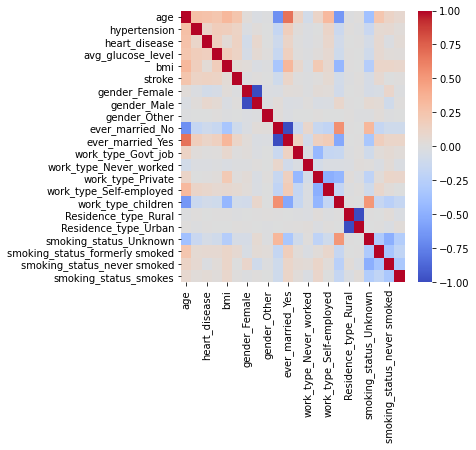

In [161]:
plt.figure(figsize=(5,5))
sns.heatmap(data3.corr(), cmap='coolwarm')

Observaciones:

1- No sirve con muchas variables

2- Muchas co-colinealidades 

3- Estaría bueno ordenar por correlación

## 6) Análisis de correlaciones no lineales basadas en teoría de la información

In [162]:
from minepy import MINE

In [163]:
# 1ro hago la especificación
mine = MINE(alpha=0.6, c=15, est="mic_approx")
# mine = MINE()

# 2do calculo de los estadísticos
mine.compute_score(data3['age'], data3['heart_disease'])

# 3ro acceso a los resultados (estadísticos)
mine.mic()

0.07139614766840953

Correr el MINE para toda la combinación de pares de columnas:

In [164]:
import itertools
col_pairs=list(itertools.combinations(data3.columns, 2))

In [165]:
df_res = pd.DataFrame()

In [166]:
for a,b in col_pairs:
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(data3[a], data3[b])
    df_res=df_res.append({"v1":a, "v2":b, "mic":mine.mic()}, ignore_index=True)

In [167]:
df_res

,v1,v2,mic
0,age,hypertension,0.077441
1,age,heart_disease,0.071396
...,...,...,...
229,smoking_status_formerly smoked,smoking_status_smokes,0.046437
230,smoking_status_never smoked,smoking_status_smokes,0.114716


Ordenar dataframe

In [168]:
sorted_df = df_res.sort_values(by=['mic'], ascending=False)

In [169]:
sorted_df.head(10)

,v1,v2,mic
216,Residence_type_Rural,Residence_type_Urban,0.999814
111,gender_Female,gender_Male,0.976056
...,...,...,...
226,smoking_status_Unknown,smoking_status_never smoked,0.254902
158,ever_married_No,work_type_children,0.237542


# Extra 🎯

Cuando quieran ver todas las columnas y filas, usen esta celda:

In [170]:
# Si quieren visualizar todas las columnas, definan None
pd.set_option('display.max_columns', None)
# Si quieren visualizar solo 5 columnas, definan 5
pd.set_option('display.max_rows', 5)

In [171]:
df_res

,v1,v2,mic
0,age,hypertension,0.077441
1,age,heart_disease,0.071396
...,...,...,...
229,smoking_status_formerly smoked,smoking_status_smokes,0.046437
230,smoking_status_never smoked,smoking_status_smokes,0.114716


## Resumen 📌

- Vimos correlaciones con ProfileReport
- Tipos de correlaciones: Pearson, Kendall, CramerV y Phi 
- Cosas a tener en cuenta: no linealidades y tipos de datos (numérico y categórico)
- OneHotEncoding con pandas (básico)
- ProfileReport no es útil para ser operativos
- Calculamos R y R2 (pearson)
- Matriz de correlación (y algunos problemas)
- Correlaciones de a pares con funpymodeling (operativo)
- Métricas basadas en teoría de la información (MINE)

---
# Ejercicio 👀

**Objetivo**
<br>Realizar un análisis exploratorio de datos para el área de Recursos Humanos. 
<br>Prácticamente vas a hacer lo que se le conoce como People Analytics.

El dataset proviene de Kaggle: [HR Analytics](https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction)

**Consigna**

**_AED 1_**
- Para el punto 4) de variables categóricas, analicen la columna `EducationField`
- Para el Análisis cuantitativo de variables categóricas, analicen `MaritalStatus`
- Con respecto a la consulta por query, consideren `t_country.query("frequency<=500")['MaritalStatus']`

**_AED 2_**
- Para el punto 1) Análisis de variables categóricas, consideren la columna `BusinessTravel`
- En 2.A) Análisis de categórica vs. categórica, consideren `BusinessTravel` vrs. `MaritalStatus`. También analicen `Gender` vrs. `Department`
- En 2.B) Análisis de numérica vs. categórica, consideren `Gender` vrs. `JobSatisfaction`
- Para el Promedio de todas las variables, nuestra variable a predecir es `Gender`
- En 2.C) Análisis de numérica vs. numérica `JobLevel` vrs. `StockOptionLevel`
- Para el Promedio de todas las variables, nuestra variable a predecir es `Age`
- Para todos los puntos 3) consideren `JobSatisfaction` vrs. `Gender`

**_Correlación_**
- Para 4) One hot encoding analicen que pasa con `data_test[['MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']]`

**A tener en cuenta**

Basarse en el notebook que hicimos en la clase.
<br> El objetivo es que una vez corrido todo el notebook, saquen **7** insights del análisis que les pareció relevante.
<br>Como por ejemplo: Hay un porcentaje elevado de jobSatisfaction en hombres respecto a las mujeres.
